# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models. 

3. Why is the Gini a good loss function for categorical target variables? 

4. Why do trees tend to overfit, and how can this tendency be constrained? 

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

In [69]:
# PART 1
import pandas as pd

# load data
df = pd.read_csv('./data/cars_hw.csv')

# print observations, features, and variables
print("Number of observations: ", df.shape[0])
print("Number of features: ", df.shape[1])
print("Available variables: ", df.columns)

df.head()

Number of observations:  976
Number of features:  12
Available variables:  Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [70]:
# PART 2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# split into two dfs
X = df[['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Mileage_Run', 'Make_Year', 'Seating_Capacity']]
y = df['Price']

# one-hot encode categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']])

# convert sparse matrix to dense format df
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out())

# concatenate the encoded and numeric variables
X = pd.concat([X_encoded_df, X[['Mileage_Run', 'Make_Year', 'Seating_Capacity']]], axis=1)

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# PART 3
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score

# Initialize a dictionary to store R^2 values for different min_samples_leaf
r2_values = {}

# Iterate over possible values for min_samples_leaf
for i in range(1, 26):
    # Initialize the decision tree regressor
    tree = DecisionTreeRegressor(min_samples_leaf=i, random_state=42)
    
    # Fit the model to the training data
    tree.fit(X_train, y_train)
    
    # Predict the target variable for the test data
    y_pred = tree.predict(X_test)
    
    # Compute the R^2 score and store it in the dictionary
    r2_values[i] = r2_score(y_test, y_pred)

# Find the choice that achieves the highest R^2 on the test data
best_min_samples_leaf = max(r2_values, key=r2_values.get)
best_r2 = r2_values[best_min_samples_leaf]

print("The choice that achieves the highest R^2 on the test data is min_samples_leaf = {}, with an R^2 of {}.".format(best_min_samples_leaf, best_r2))

The choice that achieves the highest R^2 on the test data is min_samples_leaf = 5, with an R^2 of 0.8138361995346907.


R^2:  0.8138361995346907
RMSE:  146123.7384352633


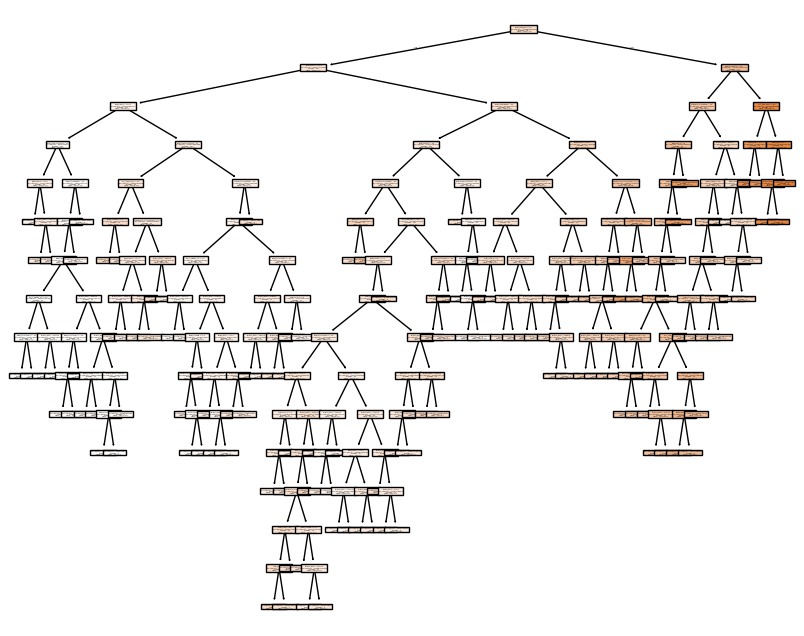

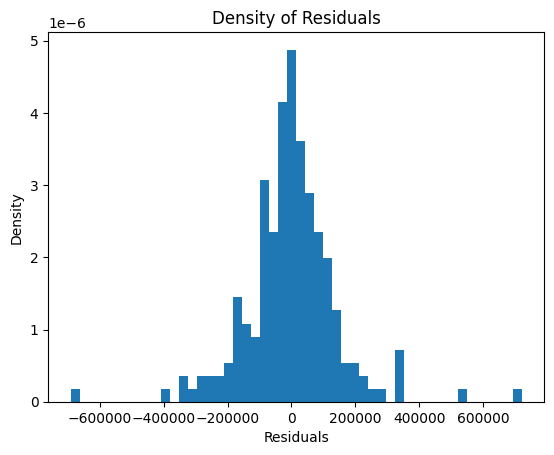

In [72]:
# PART 4
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# create decision tree with optimal value
tree = DecisionTreeRegressor(min_samples_leaf=best_min_samples_leaf, random_state=42)

# fit model
tree.fit(X_train, y_train)

# predict data
y_pred = tree.predict(X_test)

# compute R^2 and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R^2: ", r2)
print("RMSE: ", rmse)

# plot dendrogram
plt.figure(figsize=(10, 8))
plot_tree(tree, feature_names=X.columns, filled=True)
plt.show()

# plot residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=50, density=True)
plt.title("Density of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()

> The distribution of the residuals are dense at 0, with a fairly normal distribution going outwards. It's not perfect, but the general bell shape is present, and is fairly symmetric.

In [73]:
# PART 5
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# initialize model
lr_model = LinearRegression()

# fit model
lr_model.fit(X_train, y_train)

# predict data
y_pred_lr = lr_model.predict(X_test)

# compute R^2 and RMSE
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("R^2 for linear regression: ", r2_lr)
print("RMSE for linear regression: ", rmse_lr)

# compare and print the better performer
if r2_lr > r2:
    print("Linear regression performs better on the test set.")
elif r2_lr < r2:
    print("Regression tree performs better on the test set.")
else:
    print("Both models perform equally well on the test set.")

R^2 for linear regression:  0.8202733305993304
RMSE for linear regression:  143575.1966057266
Linear regression performs better on the test set.


> I think the main reason we are seeing this result is because of the linear relationship for multiple columns of data. Variables like `Make_Year` and `Mileage_Run` are prime examples that these variables have a positively/negatively linear relationship. Linear regression thrives off this, so it's not surprisign to see these results.

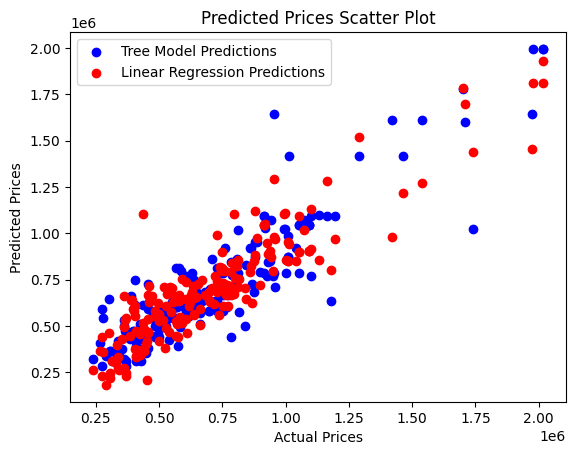

In [74]:
# PART 6

# predict for both models
y_pred_tree = tree.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# Plot the predicted values for each model
plt.scatter(y_test, y_pred_tree, label='Tree Model Predictions', color='blue')
plt.scatter(y_test, y_pred_lr, label='Linear Regression Predictions', color='red')

plt.title('Predicted Prices Scatter Plot')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

> Based on the plot above, we can see both models share pretty similar results. The graph is similar in shape, and the residuals seems to be equal in their randomness. Our values for $R^2$ and RMSE are similar enough to back up our visual observations.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [75]:
# PART 1
import pandas as pd

# load data
df = pd.read_csv('./data/Breast Cancer METABRIC.csv')

# print observations and variables
print("Number of observations: ", df.shape[0])
print("Number of variables: ", df.shape[1])

df.head()

Number of observations:  2509
Number of variables:  34


,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [76]:
# PART 2

# one-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed'])

# select numeric variables
numeric_vars = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']

# Get all columns except numeric_vars
other_vars = list(df_encoded.columns.difference(numeric_vars))

# concatenate numeric and encoded variables
X = df_encoded[numeric_vars + other_vars].values

Confusion Matrix:
 [[124   0]
 [  0  95]]
Accuracy: 1.0


[Text(0.5, 0.75, 'Overall Survival Status <= 0.5\ngini = 0.494\nsamples = 873\nvalue = [484, 389]\nclass = Deceased'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 484\nvalue = [484, 0]\nclass = Deceased'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 389\nvalue = [0, 389]\nclass = Living'),
 Text(0.625, 0.5, '  False')]

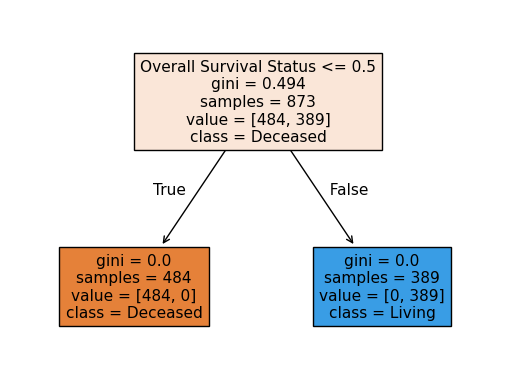

In [77]:
# PART 3
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# drop rows with missing values
df_dropped = df.dropna()

# categorical columns
categorical_cols = df_dropped.select_dtypes(include=['object']).columns

# copy dropped data
df_encoded = df_dropped.copy()

# encode categorical variables
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    if col == 'Overall Survival Status':
        target_le = le

# define features and target
X = df_encoded.iloc[:, :-1]
y = df_encoded['Overall Survival Status']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create decision tree classifier
clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

# train the model
clf.fit(X_train, y_train)

# make predictions
y_pred = clf.predict(X_test)

# print confusion matrix and accuracy
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy_score(y_test, y_pred))

# plot dendrogram
plot_tree(clf, feature_names=X.columns, class_names=target_le.classes_, filled=True)

In [78]:
# PART 4

# calculate true positive rate (sensitivity) and true negative rate (specificity)
tn, fp, fn, tp = cm.ravel()
tpr = float(tp) / (float(tp) + float(fn))
tnr = float(tn) / (float(tn) + float(fp))
print("True Positive Rate (Sensitivity):", tpr)
print("True Negative Rate (Specificity):", tnr)

True Positive Rate (Sensitivity): 1.0
True Negative Rate (Specificity): 1.0


> Nope. These seem to be the same in value.

Best R^2: 1.0
Best min_samples_leaf: 1


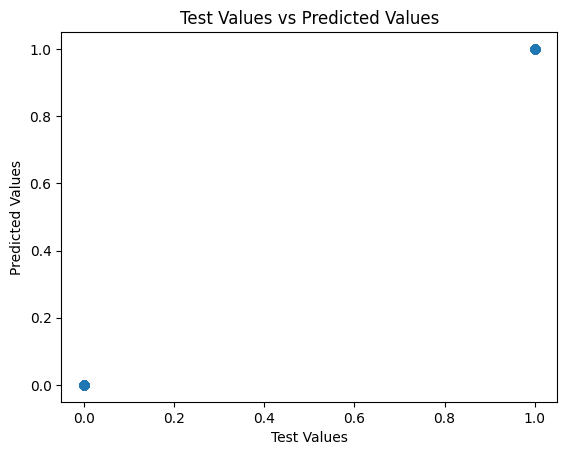

In [79]:
# PART 5
from sklearn.metrics import r2_score

# create a list of min_samples_leaf values to test
min_samples_leaf_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# initialize r^2 and min_samples_leaf
best_r2 = -1
best_min_samples_leaf = 0

# loop over each min_samples_leaf value
for min_samples_leaf in min_samples_leaf_values:
    # create tree
    clf = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, random_state=42)
    
    # fit model
    clf.fit(X_train, y_train)
    
    # predict data
    y_pred = clf.predict(X_test)
    
    # calculate r^2
    r2 = r2_score(y_test, y_pred)
    
    # store data if r^2 is better
    if r2 > best_r2:
        best_r2 = r2
        best_min_samples_leaf = min_samples_leaf

# print best R^2 and min_samples_leaf
print("Best R^2:", best_r2)
print("Best min_samples_leaf:", best_min_samples_leaf)

# plot test values against predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Test Values")
plt.ylabel("Predicted Values")
plt.title("Test Values vs Predicted Values")
plt.show()

> The model looks to be almost 'too' perfect. The $R^2$ is a perfect 1, and the confusion matrix shows no errors. At the same time, our data are very limited, so we might not get the same results. This could be overfitting. I'm highly suspiscious.

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [80]:
# PART 1
import pandas as pd

# load data
df = pd.read_csv('./data/corporate_ratings.csv')

# print observations and variables
print("Number of observations: ", df.shape[0])
print("Number of variables: ", df.shape[1])

df.head()

Number of observations:  2029
Number of variables:  31


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


<Axes: xlabel='Rating', ylabel='Count'>

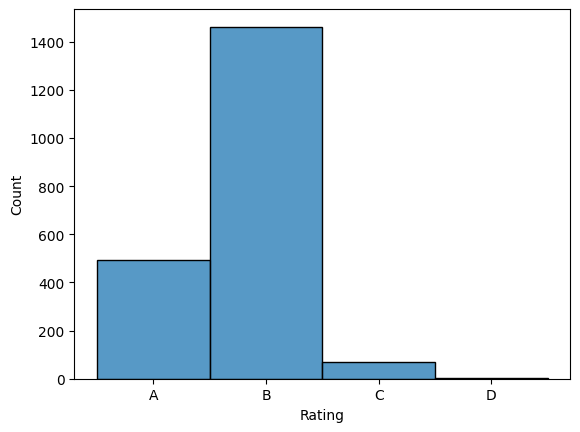

In [81]:
# PART 2
import seaborn as sns

# collapse into A, B, C, etc.
df['Rating'] = df['Rating'].apply(lambda x: 'A' if x in ['AAA', 'AA', 'A'] else ('B' if x in ['BBB', 'BB', 'B'] else ('C' if x in ['CCC', 'CC', 'C'] else x)))

# plot histogram
sns.histplot(df['Rating'])

In [82]:
# PART 3

# drop columns
df_dropped = df.drop(['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name'], axis=1)

# one-hot encode Sector
df_encoded = pd.get_dummies(df_dropped, columns=['Sector'])

# collect relevant data
X = df_encoded

In [83]:
# PART 4
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, df['Rating'], test_size=0.2, random_state=42)

# create a decision tree
clf = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

# fit model
clf.fit(X_train, y_train)

# predict data
y_pred = clf.predict(X_test)

# print confusion matrix and accuracy
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[ 50  45   1   0]
 [ 46 236  12   0]
 [  0  14   1   0]
 [  0   1   0   0]]
Accuracy: 0.7068965517241379


In [84]:
# PART 5

# include Rating Agency Name as a feature/covariate/predictor variable
df_included = df.drop(['Date', 'Name', 'Symbol'], axis=1)

# one-hot encode Sector and Rating Agency Name columns
df_encoded_included = pd.get_dummies(df_included, columns=['Sector', 'Rating Agency Name'])

# coll ect relevant variables
X_included = df_encoded_included.drop('Rating', axis=1)
y_included = df['Rating']

# encode rating column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_included)

# split data
X_train_included, X_test_included, y_train_included, y_test_included = train_test_split(X_included, y_encoded, test_size=0.2, random_state=42)

# create decision tree model
clf_included = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

# fit model
clf_included.fit(X_train_included, y_train_included)

# predict data
y_pred_included = clf_included.predict(X_test_included)

# print confusion matrix and accuracy
print(confusion_matrix(y_test_included, y_pred_included))
print("Accuracy with 'Rating Agency Name' included:", accuracy_score(y_test_included, y_pred_included))

[[ 64  32   0   0]
 [ 49 234  11   0]
 [  3   7   5   0]
 [  0   1   0   0]]
Accuracy with 'Rating Agency Name' included: 0.7463054187192119


> Yes, the results change. Our accuracy improves by almost 4%, leading to a more accurate model. However, the accuracy for later classes are about the same, so we are really only getting better accuracy for earlier classes.

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?